# Introduction to geographic data

In [1]:
DATA_PATH = "/home/jovyan/work/data"

In [14]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd

# spatial analysis libraries
import pysal

# plotting
import seaborn as sns
import contextily as cx
import matplotlib.pyplot as plt

## Import data

In [5]:
gdf = gpd.read_file(os.path.join(DATA_PATH, "plant_species_south_america.gpkg"))
gdf.head()

,PlotObservationID,GIVD_ID,Country,Biome,Species_richness,bio_1,bio_4,bio_5,bio_6,bio_8,bio_9,bio_12,bio_13,bio_14,bio_15,elev,geometry
0,1955.0,SA-AR-002,Argentina,Dry tropics and subtropics,52,17.650000,463.965149,30.500000,3.6,23.250000,11.700000,760.0,119.0,9.0,68.894028,416.0,POINT (-63.86056 -30.29722)
1,1956.0,SA-AR-002,Argentina,Dry tropics and subtropics,56,17.354166,459.552460,30.100000,3.5,22.916666,11.466666,731.0,115.0,9.0,68.933960,468.0,POINT (-63.94722 -30.37222)
2,1958.0,SA-AR-002,Argentina,Dry tropics and subtropics,65,18.316666,473.321594,31.400000,4.2,24.033333,12.250000,810.0,129.0,12.0,66.874290,232.0,POINT (-63.66278 -30.37806)
3,1960.0,SA-AR-002,Argentina,Dry tropics and subtropics,50,18.041666,485.811584,31.200001,4.2,23.933334,11.816667,842.0,140.0,13.0,65.546547,129.0,POINT (-63.32139 -30.98694)
4,1961.0,SA-AR-002,Argentina,Dry tropics and subtropics,45,18.791666,478.495911,32.000000,4.4,24.483334,12.650000,853.0,134.0,12.0,68.290054,231.0,POINT (-63.55694 -29.89889)


In [7]:
# add x and y columns
gdf.loc[:, "x"] = gdf.loc[:, "geometry"].x
gdf.loc[:, "y"] = gdf.loc[:, "geometry"].y

## Spatial neighbours

## Point pattern analysis

Point pattern analysis focuses on describing and explaining the spatial distribution of points within an area of focus. <a href="https://geographicdata.science/book/notebooks/08_point_pattern_analysis.html#introduction" target="_blank">Rey et al. (2020)</a> suggest the following are key questions related to point pattern analysis:

* What is the pattern distribution of points over space?
* Is there a structure to how points are distributed (dispersed or clustered)?
* Why are points located in some areas and not others?

<a href="https://geographicdata.science/book/notebooks/08_point_pattern_analysis.html#introduction" target="_blank">Rey et al. (2020)</a> also make clear the distinction between process and pattern. The process is the underlying mechanism that generates the outcome of points that we can see and the pattern is visual and spatial result of the process. Often, we're interested in inferring what the process is from the observable pattern. 

We can visualise the point pattern by plotting the points with longitude and latitude as the x- and y-axes on a scatter plot. As the x- and y-axes are spatial, we can use the <a href="https://contextily.readthedocs.io/en/latest/index.html" target="_blank">`contextily`</a> package to add a basemap image for context. The <a href="https://seaborn.pydata.org/generated/seaborn.jointplot.html" target="_blank">`jointplot`</a> function from the `seaborn` package lets us plot marginal histograms showing the distribution of points along the x- and y-axes. If the points are evenly distributed in space, the histogram bin heights should be relatively uniform. 

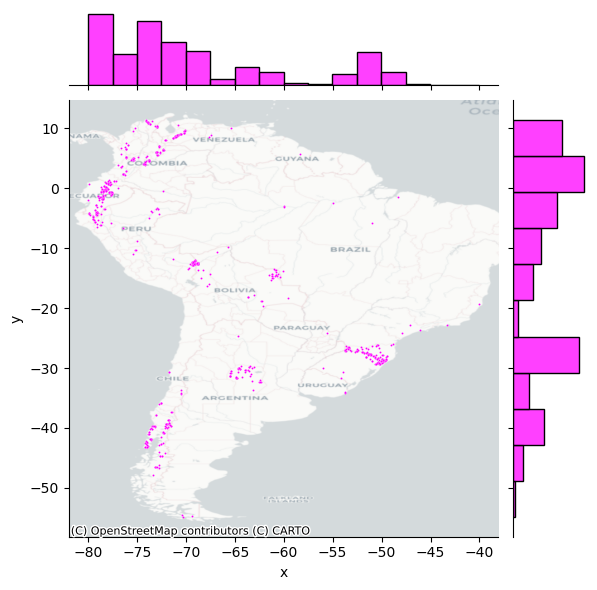

In [15]:
# Generate  xy-scatter plot
xy_scatter = sns.jointplot(
    x="x", 
    y="y", 
    data=gdf, 
    s=2,
    color="magenta",
)

# Add a basemap
cx.add_basemap(
    xy_scatter.ax_joint,
    crs="EPSG:4326",
    source=cx.providers.CartoDB.Positron,
);

## Spatial correlation

### Global spatial autocorrelation

### Variograms